In [2]:
!python --version

Python 3.8.19


### Importing Packages

In [3]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import optuna
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
import seaborn as sns
from tqdm.auto import tqdm


import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

### Loading Data ;

In [6]:
## modelling for silicon :
si_data = pd.read_csv('../data/cleaned/silicon.csv')
si_bandgap = pd.read_csv('../data/cleaned/bandgapSi.csv')

In [5]:
si_data.isnull().sum()

atomic_numbers_mean            0
atomic_numbers_max             0
atomic_numbers_min             0
atomic_numbers_std             0
volume_per_atom                0
                              ..
average_cationic_radius_std    0
average_anionic_radius_mean    0
average_anionic_radius_max     0
average_anionic_radius_min     0
average_anionic_radius_std     0
Length: 95, dtype: int64

In [6]:
si_data.shape

(5000, 95)

In [9]:
si_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 95 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   atomic_numbers_mean                           5000 non-null   float64
 1   atomic_numbers_max                            5000 non-null   int64  
 2   atomic_numbers_min                            5000 non-null   int64  
 3   atomic_numbers_std                            5000 non-null   float64
 4   volume_per_atom                               5000 non-null   float64
 5   empty_volume                                  5000 non-null   float64
 6   metals_fraction                               5000 non-null   float64
 7   distance_matrix_mean                          5000 non-null   float64
 8   distance_matrix_max                           5000 non-null   float64
 9   distance_matrix_min                           5000 non-null   f

In [7]:
si_data.head(2)

,atomic_numbers_mean,atomic_numbers_max,atomic_numbers_min,atomic_numbers_std,volume_per_atom,empty_volume,metals_fraction,distance_matrix_mean,distance_matrix_max,distance_matrix_min,distance_matrix_std,van_der_waals_radius_mean,van_der_waals_radius_max,van_der_waals_radius_min,van_der_waals_radius_std,electrical_resistivity_mean,electrical_resistivity_max,electrical_resistivity_min,electrical_resistivity_std,velocity_of_sound_mean,velocity_of_sound_max,velocity_of_sound_min,velocity_of_sound_std,reflectivity_mean,reflectivity_max,reflectivity_min,reflectivity_std,poissons_ratio_mean,poissons_ratio_max,poissons_ratio_min,poissons_ratio_std,molar_volume_mean,molar_volume_max,molar_volume_min,molar_volume_std,thermal_conductivity_mean,thermal_conductivity_max,thermal_conductivity_min,thermal_conductivity_std,melting_point_mean,melting_point_max,melting_point_min,melting_point_std,critical_temperature_mean,critical_temperature_max,critical_temperature_min,critical_temperature_std,superconduction_temperature_mean,superconduction_temperature_max,superconduction_temperature_min,superconduction_temperature_std,liquid_range_mean,liquid_range_max,liquid_range_min,liquid_range_std,bulk_modulus_mean,bulk_modulus_max,bulk_modulus_min,bulk_modulus_std,youngs_modulus_mean,youngs_modulus_max,youngs_modulus_min,youngs_modulus_std,brinell_hardness_mean,brinell_hardness_max,brinell_hardness_min,brinell_hardness_std,rigidity_modulus_mean,rigidity_modulus_max,rigidity_modulus_min,rigidity_modulus_std,vickers_hardness_mean,vickers_hardness_max,vickers_hardness_min,vickers_hardness_std,density_of_solid_mean,density_of_solid_max,density_of_solid_min,density_of_solid_std,coefficient_of_linear_thermal_expansion_mean,coefficient_of_linear_thermal_expansion_max,coefficient_of_linear_thermal_expansion_min,coefficient_of_linear_thermal_expansion_std,average_ionic_radius_mean,average_ionic_radius_max,average_ionic_radius_min,average_ionic_radius_std,average_cationic_radius_mean,average_cationic_radius_max,average_cationic_radius_min,average_cationic_radius_std,average_anionic_radius_mean,average_anionic_radius_max,average_anionic_radius_min,average_anionic_radius_std
0,13.000000,14,12,1.000000,18.856730,223.616458,0.083333,3.124381,4.791231,0.0,1.164230,1.73,1.73,1.73,0.0,4.400000e-08,4.400000e-08,4.400000e-08,0.0,4602.0,4602.0,4602.0,0.0,74.0,74.0,74.0,0.0,0.29,0.29,0.29,0.0,14.00,14.00,14.00,0.0,160.0,160.0,160.0,0.0,923.0,923.0,923.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,440.0,440.0,440.0,0.0,45.0,45.0,45.0,0.0,45.0,45.0,45.0,0.0,260.0,260.0,260.0,0.0,17.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,1738.0,1738.0,1738.0,0.0,0.000008,0.000008,0.000008,0.0,0.86,0.86,0.86,0.0,0.86,0.86,0.86,0.0,0.0,0.0,0.0,0.0
1,12.588235,41,8,9.052519,14.965699,1524.191713,0.009804,6.787983,12.008606,0.0,2.803602,2.18,2.18,2.18,0.0,1.520000e-07,1.520000e-07,1.520000e-07,0.0,3480.0,3480.0,3480.0,0.0,0.0,0.0,0.0,0.0,0.40,0.40,0.40,0.0,10.83,10.83,10.83,0.0,54.0,54.0,54.0,0.0,2750.0,2750.0,2750.0,0.0,0.0,0.0,0.0,0.0,9.25,9.25,9.25,0.0,2267.0,2267.0,2267.0,0.0,170.0,170.0,170.0,0.0,105.0,105.0,105.0,0.0,736.0,736.0,736.0,0.0,38.0,38.0,38.0,0.0,1320.0,1320.0,1320.0,0.0,8570.0,8570.0,8570.0,0.0,0.000007,0.000007,0.000007,0.0,0.82,0.82,0.82,0.0,0.82,0.82,0.82,0.0,0.0,0.0,0.0,0.0


## Model Developmment;
> ### Data Splitting;


In [7]:
X_train, X_test, y_train, y_test = train_test_split(si_data, si_bandgap, test_size=0.33, random_state=42)

In [8]:
X = X_train
y = y_train

In [9]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)


In [10]:
X.head(2)

,atomic_numbers_mean,atomic_numbers_max,atomic_numbers_min,atomic_numbers_std,volume_per_atom,empty_volume,metals_fraction,distance_matrix_mean,distance_matrix_max,distance_matrix_min,distance_matrix_std,van_der_waals_radius_mean,van_der_waals_radius_max,van_der_waals_radius_min,van_der_waals_radius_std,electrical_resistivity_mean,electrical_resistivity_max,electrical_resistivity_min,electrical_resistivity_std,velocity_of_sound_mean,velocity_of_sound_max,velocity_of_sound_min,velocity_of_sound_std,reflectivity_mean,reflectivity_max,reflectivity_min,reflectivity_std,poissons_ratio_mean,poissons_ratio_max,poissons_ratio_min,poissons_ratio_std,molar_volume_mean,molar_volume_max,molar_volume_min,molar_volume_std,thermal_conductivity_mean,thermal_conductivity_max,thermal_conductivity_min,thermal_conductivity_std,melting_point_mean,melting_point_max,melting_point_min,melting_point_std,critical_temperature_mean,critical_temperature_max,critical_temperature_min,critical_temperature_std,superconduction_temperature_mean,superconduction_temperature_max,superconduction_temperature_min,superconduction_temperature_std,liquid_range_mean,liquid_range_max,liquid_range_min,liquid_range_std,bulk_modulus_mean,bulk_modulus_max,bulk_modulus_min,bulk_modulus_std,youngs_modulus_mean,youngs_modulus_max,youngs_modulus_min,youngs_modulus_std,brinell_hardness_mean,brinell_hardness_max,brinell_hardness_min,brinell_hardness_std,rigidity_modulus_mean,rigidity_modulus_max,rigidity_modulus_min,rigidity_modulus_std,vickers_hardness_mean,vickers_hardness_max,vickers_hardness_min,vickers_hardness_std,density_of_solid_mean,density_of_solid_max,density_of_solid_min,density_of_solid_std,coefficient_of_linear_thermal_expansion_mean,coefficient_of_linear_thermal_expansion_max,coefficient_of_linear_thermal_expansion_min,coefficient_of_linear_thermal_expansion_std,average_ionic_radius_mean,average_ionic_radius_max,average_ionic_radius_min,average_ionic_radius_std,average_cationic_radius_mean,average_cationic_radius_max,average_cationic_radius_min,average_cationic_radius_std,average_anionic_radius_mean,average_anionic_radius_max,average_anionic_radius_min,average_anionic_radius_std
0,9.6,20,6,3.912374,14.449911,860.788812,0.016667,4.559010,7.623971,0.0,1.371764,2.31,2.31,2.31,0.0,3.400000e-08,3.400000e-08,3.400000e-08,0.0,3810.0,3810.0,3810.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,26.20,26.20,26.20,0.0,200.0,200.0,200.0,0.0,1115.0,1115.0,1115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,642.0,642.0,0.0,17.0,17.0,17.0,0.0,20.0,20.0,20.0,0.0,167.0,167.0,167.0,0.0,7.4,7.4,7.4,0.0,0.0,0.0,0.0,0.0,1550.0,1550.0,1550.0,0.0,0.000022,0.000022,0.000022,0.0,1.14,1.14,1.14,0.0,1.14,1.14,1.14,0.0,0.0,0.0,0.0,0.0
1,47.5,76,14,28.718461,163.267780,649.591979,0.250000,2.230172,4.473877,0.0,1.572374,2.06,2.06,2.06,0.0,1.270000e-07,1.270000e-07,1.270000e-07,0.0,5940.0,5940.0,5940.0,0.0,0.0,0.0,0.0,0.0,0.21,0.21,0.21,0.0,7.23,7.23,7.23,0.0,94.0,94.0,94.0,0.0,2180.0,2180.0,2180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,764.0,764.0,764.0,0.0,160.0,160.0,160.0,0.0,279.0,279.0,279.0,0.0,1120.0,1120.0,1120.0,0.0,115.0,115.0,115.0,0.0,1060.0,1060.0,1060.0,0.0,7140.0,7140.0,7140.0,0.0,0.000005,0.000005,0.000005,0.0,0.94,0.94,0.94,0.0,0.94,0.94,0.94,0.0,0.0,0.0,0.0,0.0


In [11]:
X.shape

(3350, 95)

In [12]:
y.shape

(3350, 1)

In [13]:
y.head(2)

,band_gap
0,0.3747
1,0.0000


### Hyper-Parameter Optimization;
> Using Optuna [Tree Structured Parzen Estimator (TPE) ];

In [10]:
def objective(trial, X, y):
   
    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 3, 5),
                'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
                'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
                'min_child_weight':trial.suggest_int('min_child_weight',0,5),
                'gamma':trial.suggest_uniform('gamma', 0, 4),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.05,0.5),
                'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.4,0.9),
                'subsample':trial.suggest_uniform('subsample',0.4,0.9)
            }
    
    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = XGBRegressor(**param)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="mae",
            early_stopping_rounds=100)
        preds = model.predict(X_test)
        cv_scores[idx] = mean_absolute_error(y_test, preds)

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize", study_name="XGB regressor")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20, show_progress_bar=True)

--- Output of hyper-parameter optimization redacted ---

In [12]:
study.best_value

0.6107956870163411

In [13]:
model = XGBRegressor(**study.best_params)

model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.677327527921576, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.0198587613493042, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07844954121151138, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=370, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=4.785001729031604,
             reg_lambda=0.677503855518833, ...)

### Model Evaluation:

In [16]:
X_test.reset_index(drop=True, inplace=True)

In [17]:
y_test.reset_index(drop=True, inplace=True)


In [18]:
predictions = model.predict(X_test)

> RMSE Score:

In [20]:
print(f"RMSE value = {(mean_squared_error(y_test,predictions))**0.5}")

RMSE value = 0.9762977926675184


> $R^2 - Score$ :

In [22]:
r2 = r2_score(y_test, predictions)


In [23]:
r2

0.7525909058536742

<Figure size 1000x2000 with 0 Axes>

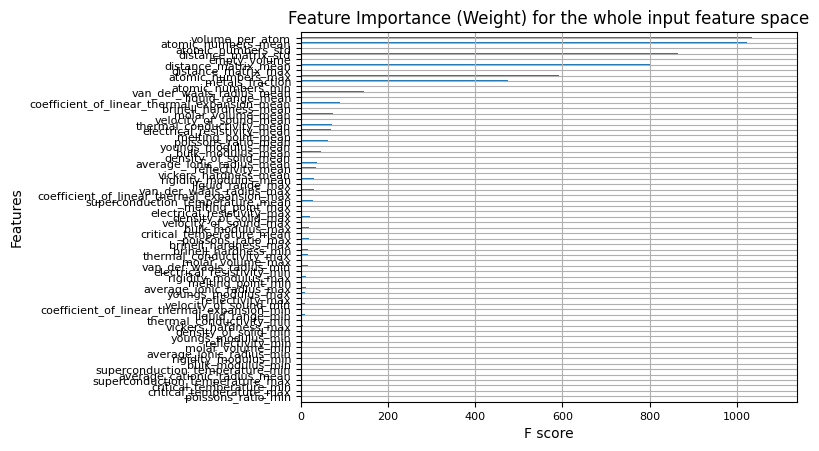

In [29]:
plt.figure(figsize=(10, 20))
ax = xgb.plot_importance(model, importance_type='weight', show_values=False, title='Feature Importance (Weight) for the whole input feature space')
ax.tick_params(axis='both', which='major', labelsize=8)  

# saving the image
plt.savefig("../assets/feature_importance_95ftrs.jpg", bbox_inches='tight')


In [63]:
# Function to make prediction vs actual plots

def plot_predictions_vs_actual(y_true, y_pred, score_value, model_name=None, figsize=(8, 6),
                               title="Predictions vs. Actual Values",
                               xlabel="Actual Values", ylabel="Predicted Values",
                               cmap="viridis", alpha=0.7):
    """
    Plots a scatter plot of predictions vs. actual values, including an evaluation score annotation.

    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted values.
        score_value (float): Evaluation score to display on the plot.
        model_name (str, optional): Name of the model to include in the title.
        figsize (tuple, optional): Figure size. Defaults to (8, 6).
        title (str, optional): Plot title. Defaults to "Predictions vs. Actual Values".
        xlabel (str, optional): X-axis label. Defaults to "Actual Values".
        ylabel (str, optional): Y-axis label. Defaults to "Predicted Values".
        alpha (float, optional): Transparency of scatter points. Defaults to 0.7.
    """

    plt.figure(figsize=figsize)
    plt.scatter(y_true, y_true, color='darkred', alpha=alpha, label='True Values', marker='.')
    plt.scatter(y_true, y_pred, color='k', alpha=alpha, label='Predicted Values',  marker='x')

    if model_name:
        plt.title(f"{title} - {model_name}")
    else:
        plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid(True)

    # Annotate with evaluation score
    score_text = f"r2_Score: {score_value:.4f}"
    plt.annotate(score_text, xy=(0.8, 0.2), xycoords="axes fraction", fontsize=12, color="black")

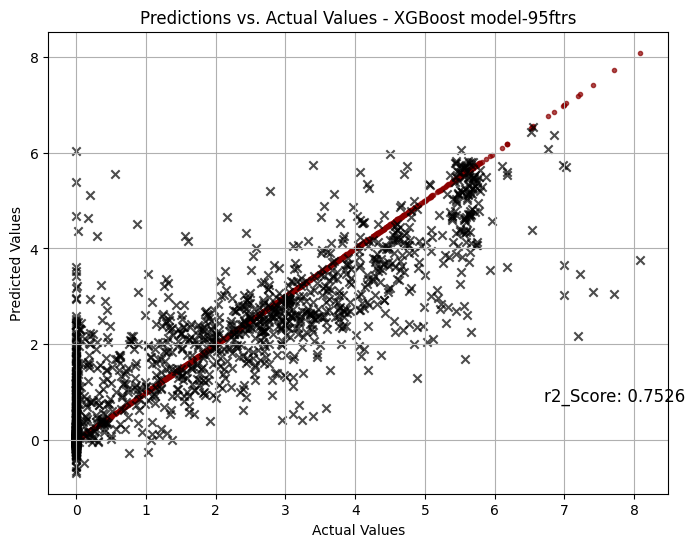

In [65]:
plot_predictions_vs_actual(y_test, model.predict(X_test), r2_score(y_test,model.predict(X_test)), model_name='XGBoost model-95ftrs')
plt.savefig("../assets/pred_plot_xgboost96ftrs.jpg", bbox_inches='tight')

In [22]:
# save model to a pickle file to avoid reruns between sessions:

joblib.dump(model, '../models/silicon_model_1.joblib')


['../models/silicon_model_1.joblib']

### using feature importance to reduce input feature space by 70%

In [66]:
feature_importances_ = model.get_booster().get_score(importance_type='weight')


In [67]:
feature_importance_df = pd.DataFrame(list(feature_importances_.items()), columns=['Feature', 'Importance'])

# Sort by importance (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [68]:
# taking the top 30 features ranked by feature importance
sample_features = feature_importance_df.iloc[:30,:]

In [69]:
sample_features.Feature.nunique()

30

In [70]:
X_sampled = X.loc[:,sample_features.Feature.values]
y_sampled = y.copy()

In [ ]:
## Retraining on the sampled features:

study = optuna.create_study(direction="minimize", study_name="XGB regressor")
func = lambda trial: objective(trial, X_sampled, y_sampled)
study.optimize(func, n_trials=20, show_progress_bar=True)

--- Output of hyper-parameter optimization redacted ---

In [36]:
study.best_value

0.6246223631924772

In [37]:
model_sampled = XGBRegressor(**study.best_params)

model_sampled.fit(X_sampled,y_sampled)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7920858468672387, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.0814444111934558, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0970407682059583, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=240, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=3.212202318631169, reg_lambda=0.9303195321997901, ...)

In [72]:
predictions_sampled = model_sampled.predict(X_test.loc[:,sample_features.Feature.values])

print(f"RMSE value = {(mean_squared_error(y_test,predictions_sampled))**0.5}")

RMSE value = 0.9945795309846897


> $r^2$  Score for the reduced feature space :

In [45]:
r2 = r2_score(y_test, predictions_sampled)


In [73]:
r2

0.7525909058536742

<Figure size 1200x600 with 0 Axes>

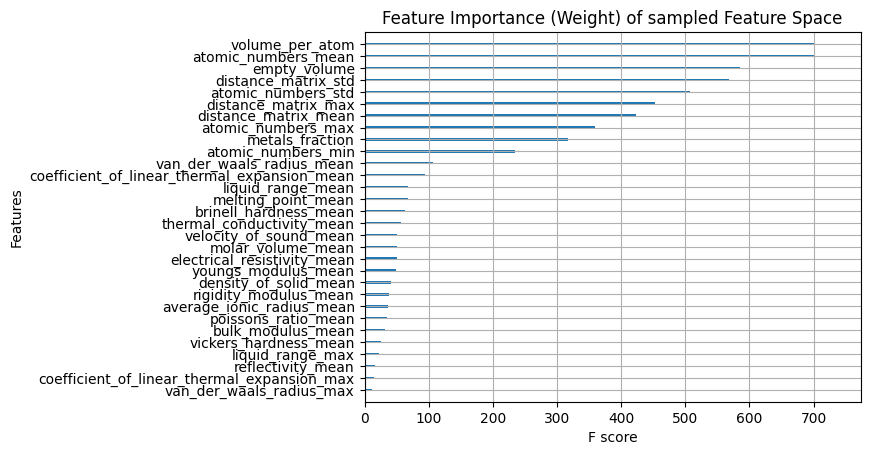

In [74]:
plt.figure(figsize=(12, 6))
xgb.plot_importance(model_sampled, importance_type='weight', show_values=False, title='Feature Importance (Weight) of sampled Feature Space')
# saving the image
plt.savefig("../assets/feature_importance_30ftrs.jpg", bbox_inches='tight')

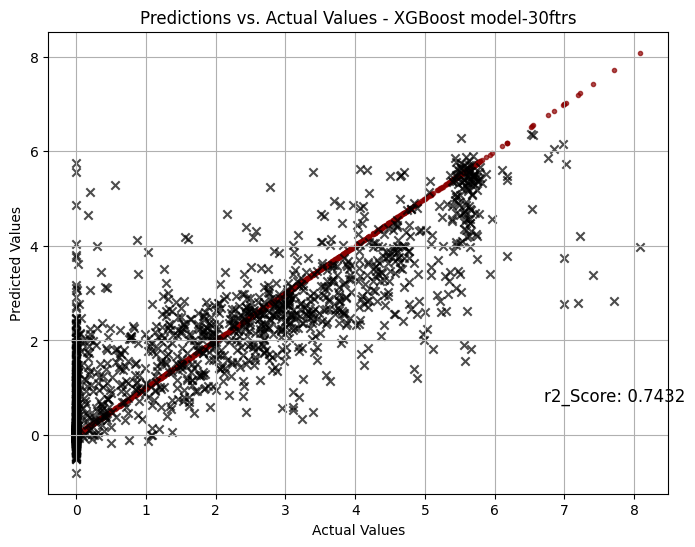

In [75]:
plot_predictions_vs_actual(y_test, predictions_sampled, r2_score(y_test,predictions_sampled), model_name='XGBoost model-30ftrs')
plt.savefig("../assets/pred_plot_xgboost_30ftrs.jpg", bbox_inches='tight')

In [41]:
# save sampled model to a file to avoid reruns between sessions:

joblib.dump(model_sampled, '../models/silicon_model_30ftrs_1.joblib')


['../models/silicon_model_30ftrs_1.joblib']